In [1]:
import turtle
import cv2
import numpy as np
from matplotlib import pyplot as plt


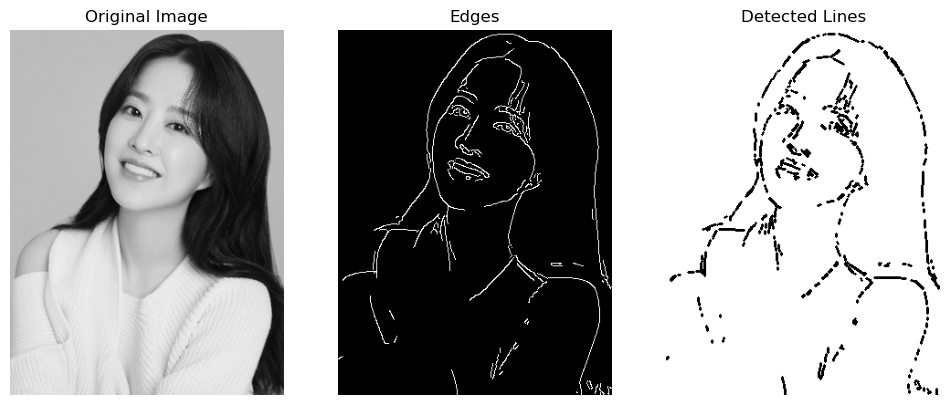

Detected lines coordinates:
139 min


In [2]:
def detect_edges_and_lines(image_path):
    # 이미지를 읽어옴
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, dsize=(300,400)) # 20cmx20cm 좌표를 4등분하여 한칸에 0.25cm를 이동할 수 있도록 구성
    # 가우시안 블러를 적용하여 노이즈 감소
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Canny 엣지 검출
    edges = cv2.Canny(blurred, 70, 100)

    # 허프 변환을 사용하여 직선 검출
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=0, minLineLength=2, maxLineGap=1)

    # 검출된 직선의 좌표를 리스트로 저장
    line_coordinates = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            line_coordinates.append(((x1, y1), (x2, y2)))


    # 검출된 윤곽선을 흰 배경에 그림
    blank_image_lines = np.ones_like(image) * 255  # 흰 배경 이미지 생성
    for line in line_coordinates:
        cv2.line(blank_image_lines, line[0], line[1], (0, 0, 0), 2)  # 검은색으로 선 그리기

    # 결과 이미지를 Colab에서 표시
    plt.figure(figsize=(12, 6))

    # 원본 이미지 표시
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # 엣지 표시
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')

    # 검출된 윤곽선 표시
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(blank_image_lines, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines')
    plt.axis('off')

    plt.show()


    return line_coordinates

# 이미지 경로 설정
image_path = 'image.jpg'

# 엣지 및 직선 검출 수행
lines = detect_edges_and_lines(image_path)

# 검출된 직선의 좌표 출력
print("Detected lines coordinates:")
time = 20 #로봇이 한 획을 긋고 펜을 떼고 다음 지점까지 이동하는게 걸리는 시간(초)
print(int(len(lines)*time/60), end = '')
print(' min')
#for line in lines:
#    print(line)

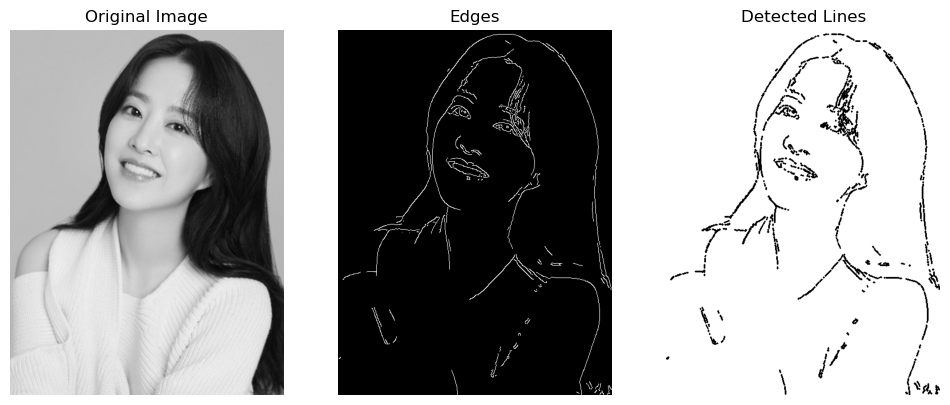

[((1, 576), (3, 574)), ((2, 576), (3, 575)), ((4, 574), (4, 573)), ((8, 437), (9, 437)), ((9, 436), (13, 432)), ((16, 431), (18, 431)), ((20, 430), (21, 429)), ((23, 429), (24, 428)), ((25, 428), (26, 428)), ((29, 427), (31, 427)), ((32, 426), (38, 425)), ((51, 423), (63, 423)), ((60, 489), (60, 488)), ((62, 494), (62, 492)), ((63, 498), (63, 495)), ((63, 424), (64, 423)), ((63, 486), (64, 488)), ((63, 351), (66, 349)), ((64, 501), (64, 499)), ((64, 490), (65, 491)), ((64, 351), (65, 350)), ((65, 423), (67, 421)), ((65, 503), (65, 501)), ((66, 505), (66, 503)), ((66, 423), (66, 424)), ((67, 417), (67, 411)), ((67, 499), (69, 503)), ((67, 498), (68, 500)), ((67, 430), (67, 428)), ((67, 506), (69, 505)), ((67, 349), (68, 349)), ((67, 509), (67, 507)), ((67, 423), (67, 424)), ((68, 406), (68, 400)), ((68, 397), (69, 395)), ((68, 509), (68, 511)), ((69, 389), (70, 388)), ((69, 349), (77, 344)), ((69, 513), (69, 512)), ((70, 506), (70, 505)), ((70, 517), (73, 523)), ((70, 351), (73, 349)), 

In [28]:

def sort_by_adjacency(tuple1, tuple2):
    return tuple1[1] == tuple2[0]

# 이미지 경로 설정
image_path = 'image.jpg'
# 엣지 및 직선 검출 수행
lines = detect_edges_and_lines(image_path)


# 리스트 정렬
sorted_list = sorted(lines, key=lambda x: x[0][0])
print(sorted_list)
# 검출된 직선의 좌표 출력
print("Detected lines coordinates:")
#for line in lines:
#    print(line)

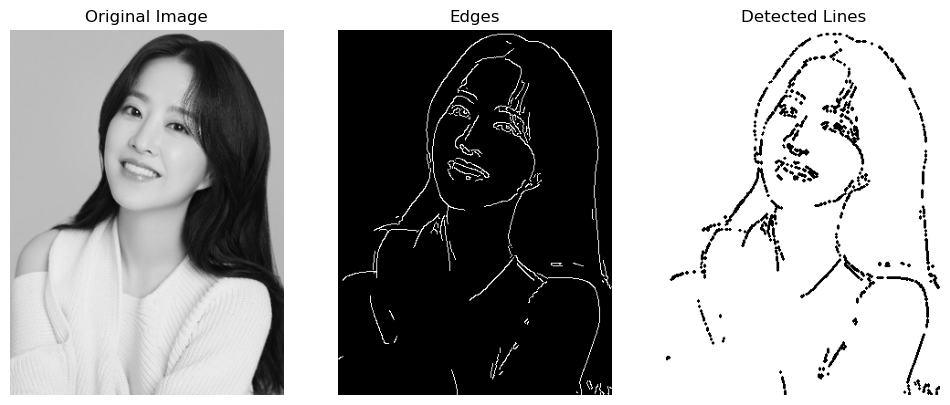

[((0, 360), (2, 358)), ((2, 359), (3, 358)), ((5, 273), (6, 273)), ((7, 272), (10, 269)), ((7, 271), (8, 270)), ((11, 269), (12, 268)), ((12, 269), (13, 268)), ((15, 268), (16, 267)), ((17, 267), (18, 266)), ((22, 266), (23, 265)), ((30, 265), (31, 264)), ((35, 296), (35, 297)), ((36, 303), (36, 302)), ((38, 260), (38, 259)), ((38, 307), (38, 308)), ((38, 256), (39, 254)), ((39, 251), (39, 246)), ((39, 265), (40, 264)), ((39, 311), (39, 310)), ((40, 219), (42, 217)), ((40, 245), (40, 242)), ((40, 313), (41, 316)), ((41, 264), (42, 263)), ((41, 265), (42, 264)), ((41, 317), (41, 318)), ((42, 259), (42, 257)), ((42, 271), (42, 268)), ((42, 218), (44, 217)), ((42, 250), (43, 249)), ((43, 322), (43, 321)), ((43, 244), (43, 243)), ((44, 242), (44, 240)), ((45, 237), (46, 237)), ((45, 329), (45, 326)), ((45, 217), (45, 216)), ((45, 219), (46, 218)), ((45, 239), (45, 238)), ((46, 236), (46, 235)), ((47, 333), (47, 332)), ((47, 235), (47, 233)), ((47, 216), (47, 215)), ((48, 215), (49, 214)), 

Terminator: 

In [61]:

def draw_lines_with_turtle(line_coordinates):
    # 초기화

    turtle.home()
    turtle.speed(10)
   #print(line_coordinates)
    # 좌표 리스트를 따라 그리기
    for line in line_coordinates:
        print(f'now line = {type(line[0][0])}')
        turtle.penup()

        turtle.goto(int(line[0][0]), int(line[0][1]))
        turtle.pendown()
        turtle.goto(int(line[1][0]), int(line[1][1]))

    # 화면 유지
    turtle.done()

# 이미지 경로 설정
image_path = 'image.jpg'


# 엣지 및 직선 검출 수행
lines = detect_edges_and_lines(image_path)
# sorted_list = sorted(lines, key=lambda x: x[0][0])
sorted_list = sorted(lines, key=lambda x: x[0][0])
print(sorted_list)
draw_lines_with_turtle(sorted_list)

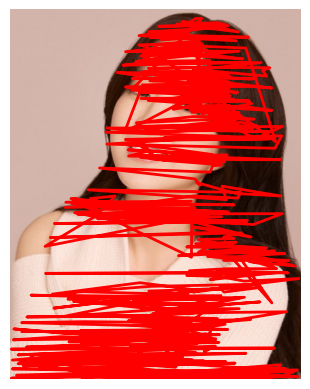

In [47]:
import cv2
import numpy as np

def find_drawing_path(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    
    # 그레이 스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Canny edge detection을 이용하여 엣지 검출
    edges = cv2.Canny(gray, 50, 100)
    
    # 경로 찾기
    contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 경로 중심 좌표 추출
    drawing_path = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            drawing_path.append((cX, cY))
    
    return drawing_path

def plot_drawing_path(image_path):
    # 이미지 읽기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 경로 찾기
    drawing_path = find_drawing_path(image_path)
    
    # 이미지 plot
    plt.imshow(image_rgb)
    
    # 경로 plot
    if drawing_path:
        drawing_path = np.array(drawing_path)
        plt.plot(drawing_path[:, 0], drawing_path[:, 1], 'r-', linewidth=2)
    
    plt.axis('off')
    plt.show()

# 이미지 파일 경로
image_path = "image.jpg"

# 그림을 그릴 경로 찾기
plot_drawing_path(image_path)
# print("Drawing Path:", drawing_path)

In [ ]:
def detect_edges_and_lines(image_path, i,j,k):
    # 이미지를 읽어옴
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, dsize=(40,40)) # 10cmx10cm 좌표를 4등분하여 한칸에 0.25cm를 이동할 수 있도록 구성
    # 가우시안 블러를 적용하여 노이즈 감소
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Canny 엣지 검출
    edges = cv2.Canny(blurred, 70, 100)


    # 허프 변환을 사용하여 직선 검출
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=i, minLineLength=j, maxLineGap=k)

    # 검출된 직선의 좌표를 리스트로 저장
    line_coordinates = []
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            line_coordinates.append(((x1, y1), (x2, y2)))


    # 검출된 윤곽선을 흰 배경에 그림
    blank_image_lines = np.ones_like(image) * 255  # 흰 배경 이미지 생성
    for line in line_coordinates:
        cv2.line(blank_image_lines, line[0], line[1], (0, 0, 0), 2)  # 검은색으로 선 그리기

    # 결과 이미지를 Colab에서 표시
    plt.figure(figsize=(12, 6))

    # 원본 이미지 표시
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # 엣지 표시
    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.axis('off')

    # 검출된 윤곽선 표시
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(blank_image_lines, cv2.COLOR_BGR2RGB))
    plt.title('Detected Lines')
    plt.axis('off')

    plt.show()


    return line_coordinates

# 이미지 경로 설정
image_path = 'image4.jpeg'

# 엣지 및 직선 검출 수행
# k는 2~3 까지만 하면 될
for i in range(10):
  for j in range(10):
    for k in range(1, 4):
      lines = detect_edges_and_lines(image_path,i,j,k)

      # 검출된 직선의 좌표 출력
      print("Detected lines coordinates:")
      time = 5 #로봇이 한 획을 긋고 펜을 떼고 다음 지점까지 이동하는게 걸리는 시간(초)
      print(int(len(lines)*time/60), end = '')
      print(f' min and {i}, {j}, {k}')
      #for line in lines:
        #    print(line)

In [ ]:
#!/usr/bin/env python3

import rospy
from geometry_msgs.msg import Point
import pyautogui
from pynput import keyboard
import os

# pyautogui.PAUSE = 1
## pyautogui.FAILSAFE True

# def on_press(key):
#     global z
#     if key == keyboard.Key.space:
#         z = -5.0

# def on_release(key):
#     global z
#     if key == keyboard.Key.space:
#         z = 0.0
def onpen():
    global x,y,z
    z = -5.0
    pub.publish(mouse_position_msg)
def uppen():
    global x,y,z
    z = 0.0

def move_with_uppen(start_x,start_y):
    global x, y, z

def draw_with_onpen(end_x,end_y)

def move_to(x, y, z):

def Position():
    global z
    z = 0.0
    pub = rospy.Publisher('/mouse_position', Point, queue_size = 100)
    rospy.init_node('mouse_postion', anonymous = True)

    rate = rospy.Rate(1)

    #초기 위치로 publish코드 here
    #uppen 상태임
    while not rospy.is_shutdown():
        os.system('clear')

        uppen()
        # 첫 번째 좌표로 이동
        # onpen()
        # 두 번쨰 좌표로 이동
        # uppen()
        # x, y = get_mouse_position()
        mouse_position_msg = Point()
        mouse_position_msg.x = x
        mouse_position_msg.y = y
        mouse_position_msg.z = z

        pub.publish(mouse_position_msg)
        rate.sleep()

def get_mouse_position():
    x, y = pyautogui.position()
    return x, y


if __name__ == '__main__':
    try:
        Position()
    except rospy.ROSInterruptException:
        pass


Detected contour coordinates:
[[7, 5], [6, 6], [5, 7], [5, 8], [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14], [5, 15], [5, 16], [5, 17], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [5, 30], [5, 31], [5, 32], [6, 33], [7, 34], [8, 34], [9, 34], [10, 34], [11, 34], [12, 34], [13, 34], [14, 34], [15, 34], [16, 34], [17, 34], [18, 34], [19, 34], [20, 34], [21, 34], [22, 34], [23, 34], [24, 34], [25, 34], [26, 34], [27, 34], [28, 34], [29, 34], [30, 34], [31, 34], [32, 34], [33, 33], [34, 32], [34, 31], [34, 30], [34, 29], [34, 28], [34, 27], [34, 26], [34, 25], [34, 24], [34, 23], [34, 22], [34, 21], [34, 20], [34, 19], [34, 18], [34, 17], [34, 16], [34, 15], [34, 14], [34, 13], [34, 12], [34, 11], [34, 10], [34, 9], [34, 8], [34, 7], [33, 6], [32, 5], [31, 5], [30, 5], [29, 5], [28, 5], [27, 5], [26, 5], [25, 5], [24, 5], [23, 5], [22, 5], [21, 5], [20, 5], [19, 5], [18, 5], [17, 5], [16, 5], [15, 5], [14, 5], [13, 5], 

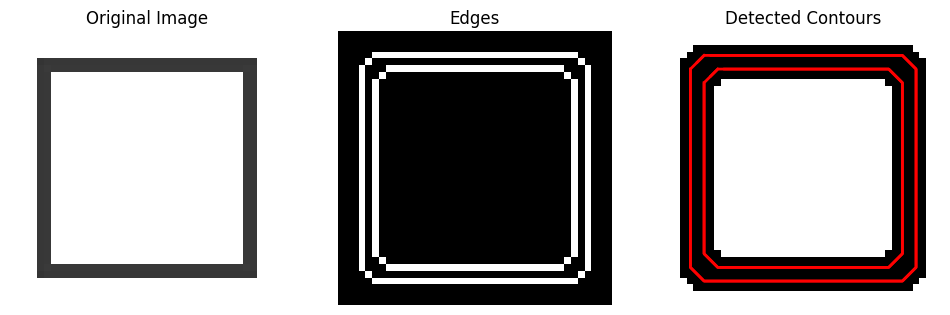

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
image_size = 40
def detect_edges_and_contour_coordinates(image_path):
    # 이미지를 읽어옴
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, dsize=(image_size,image_size))
    # Canny 엣지 검출
    edges = cv2.Canny(image, 100, 150)

    # 이미지에서 엣지를 따라 윤곽선 좌표를 찾음
    contours, _ = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

    # 윤곽선 좌표를 리스트로 저장
    contour_coordinates = []
    for contour in contours:
        contour_coordinates.append(contour.squeeze().tolist())

    return image, edges, contour_coordinates
def draw_contours_on_white_background(image, contour_coordinates):
    # 흰 배경 이미지 생성
    image = cv2.resize(image, dsize=(image_size,image_size))
    blank_image = np.ones_like(image) * 255

    # 윤곽선을 흰 배경에 그림
    for contour in contour_coordinates:
        contour = np.array(contour).reshape((-1, 2))
        cv2.drawContours(blank_image, [contour.astype(int)], 0, (0, 0, 0), 2)

    return blank_image

# 업로드한 이미지 파일명 추출
image_path = 'square.jpg'

# 엣지 및 윤곽선 좌표 검출 수행
image, edges, contour_coordinates = detect_edges_and_contour_coordinates(image_path)
print("Detected contour coordinates:")
for contour in contour_coordinates:
    print(contour)
white_background_image = draw_contours_on_white_background(image, contour_coordinates)
# 원본 이미지 및 결과를 Matplotlib으로 그리기
plt.figure(figsize=(12, 6))

# 원본 이미지 표시
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# 엣지 표시
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

# 윤곽선 표시
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(white_background_image, cv2.COLOR_BGR2RGB))

for contour in contour_coordinates:
    contour = np.array(contour).reshape((-1, 2))
    plt.plot(contour[:, 0], contour[:, 1], color='red', linewidth=2)

plt.title('Detected Contours')
plt.axis('off')

plt.show()

In [ ]:
|